In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-10-16 11:13:22--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.198
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  28.22M  21.2MB/s    in 1.3s    

2022-10-16 11:13:24 (21.2 MB/s) - ‘images.zip.1’ saved [29586716/29586716]

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

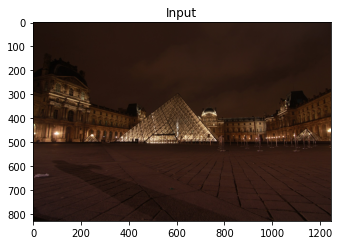

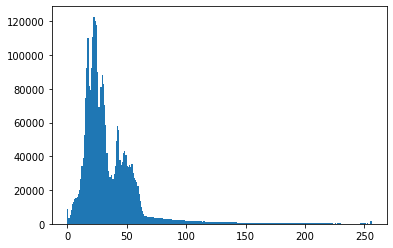

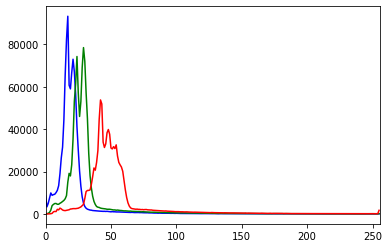

In [34]:
image = cv2.imread('/content/images/input.jpg')
imshow("Input", image)

plt.hist(image.ravel(),256 ,[0,256])
plt.show()

color = ('b','g','r')

for i, col in enumerate(color):
  histogram2 = cv2.calcHist([image], [i], None, [256], [0,256])
  plt.plot(histogram2 ,color = col)
  plt.xlim([0,256])
plt.show()

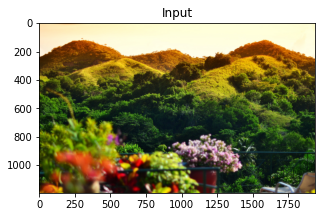

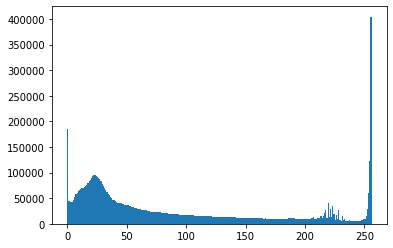

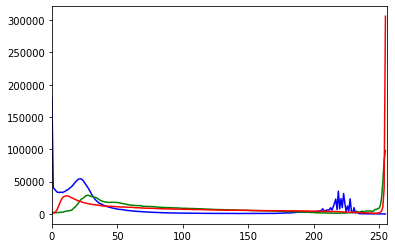

In [35]:
image = cv2.imread('/content/images/tobago.jpg')
imshow('Input', image)

histogram = cv2.calcHist([image],[0],None,[256],[0,256])

plt.hist(image.ravel(),256,[0,256]); plt.show()

color= ('b','g','r')

for i,col in enumerate(color):
  histogram2 = cv2.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histogram2, color = col)
  plt.xlim([0,256])
plt.show()

In [36]:
def centroidHistogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plotColors(hist, centroids):
    bar = np.zeros((100, 500, 3), dtype = "uint8")

    x_start = 0
    for (percent, color) in zip(hist, centroids):
      end = x_start + (percent * 500)
      cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
      x_start = end
    return bar

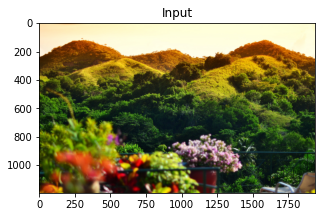

(1194, 1936, 3)
(2311584, 3)


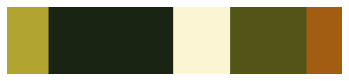

In [37]:

from sklearn.cluster import KMeans

image = cv2.imread('/content/images/tobago.jpg')
imshow('Input', image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

plt.figure()
plt.axis('off')
plt.imshow(bar)
plt.show()

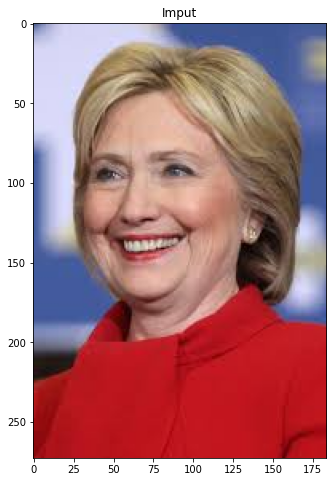

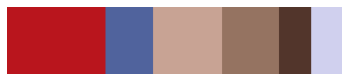

In [38]:
from sklearn.cluster import KMeans

image = cv2.imread('/content/images/Hillary.jpg')
imshow('Imput', image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

number_of_cluster = 6
clt = KMeans(number_of_cluster)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColors(hist, clt.cluster_centers_)

plt.figure()
plt.axis('off')
plt.imshow(bar)
plt.show()